In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [19]:
data = pd.read_csv('fraud_dectectionscaled.csv')
data = data.drop(columns = 'Unnamed: 0')
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.0,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1344288,124519.88,0.0,0.00,612413.54,736933.42,0.0,1.0,0.0,0.0,0.0,0.0
1344289,124915.42,0.0,0.00,420475.73,545391.15,0.0,1.0,0.0,0.0,0.0,0.0
1344290,293854.63,0.0,0.00,294364.98,588219.60,0.0,1.0,0.0,0.0,0.0,0.0
1344291,131164.94,0.0,0.00,376562.97,507727.91,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
data = data.dropna()
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.0,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1344287,27946.22,0.0,0.00,78954.68,106900.90,0.0,1.0,0.0,0.0,0.0,0.0
1344288,124519.88,0.0,0.00,612413.54,736933.42,0.0,1.0,0.0,0.0,0.0,0.0
1344289,124915.42,0.0,0.00,420475.73,545391.15,0.0,1.0,0.0,0.0,0.0,0.0
1344290,293854.63,0.0,0.00,294364.98,588219.60,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
# Separate input features and target
y = data.Fraud
X = data.drop('Fraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [23]:
X_train

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
125281,-0.522396,1.942604,1.919180,-0.340379,-0.387830,0.0,0.0,0.0,0.0,0.0
601935,0.793284,-0.293777,-0.297119,0.320912,0.409327,1.0,0.0,0.0,0.0,0.0
993618,-0.252966,-0.257462,-0.292752,-0.429277,-0.424839,1.0,0.0,0.0,0.0,0.0
494621,-0.493684,-0.180684,-0.195025,-0.361369,-0.387193,1.0,0.0,0.0,0.0,0.0
1192219,-0.534491,-0.293777,-0.297119,-0.429277,-0.463969,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
359783,-0.483369,-0.236504,-0.251106,-0.429277,-0.463969,0.0,0.0,1.0,0.0,1.0
152315,1.029351,-0.280308,-0.297119,-0.233175,-0.092908,1.0,0.0,0.0,0.0,0.0
963395,-0.597851,-0.270077,-0.273866,-0.429277,-0.463969,0.0,0.0,1.0,0.0,1.0
117952,1.868324,-0.293777,-0.297119,4.462011,4.576067,0.0,0.0,0.0,1.0,0.0


In [24]:
# train model
rfc = RandomForestClassifier(n_estimators=30)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test, rfc_pred))
    

print(f1_score(y_test, rfc_pred))
    

print(recall_score(y_test, rfc_pred))

0.9995933427228184
0.8079625292740047
0.6913827655310621


In [25]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

Accuracy: 0.9995933427228184


In [26]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    402789
         1.0       0.97      0.69      0.81       499

    accuracy                           1.00    403288
   macro avg       0.99      0.85      0.90    403288
weighted avg       1.00      1.00      1.00    403288



In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rcf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
rcf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [28]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None ,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [29]:
import pandas as pd
feature_imp = pd.Series(rcf.feature_importances_,index= X_train.columns)
feature_imp

Amount            0.225284
OldbalanceOrg     0.290449
NewbalanceOrig    0.032958
OldbalanceDest    0.139538
NewbalanceDest    0.254277
Type_CASH_OUT     0.020766
Type_DEBIT        0.000505
Type_PAYMENT      0.000330
Type_TRANSFER     0.035786
Type2_CM          0.000107
dtype: float64

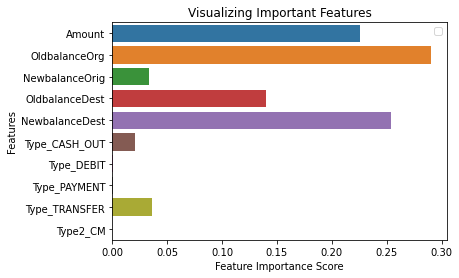

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [34]:
# Import train_test_split function
# Split dataset into features and labels
X=data[['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest','Type_CASH_OUT','Type_TRANSFER']] 
# Removed feature Type_DEBIT , Type_PAYMENT ,Type2_CM
y=data.Fraud                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=5) # 70% training and 30% test

In [35]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rcf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
rcf.fit(X_train,y_train)

# prediction on test set
y_pred=rcf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9996082204280812


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    402823
         1.0       0.96      0.69      0.80       465

    accuracy                           1.00    403288
   macro avg       0.98      0.84      0.90    403288
weighted avg       1.00      1.00      1.00    403288



In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[402811,     12],
       [   146,    319]])

Text(69.0, 0.5, 'Fraud')

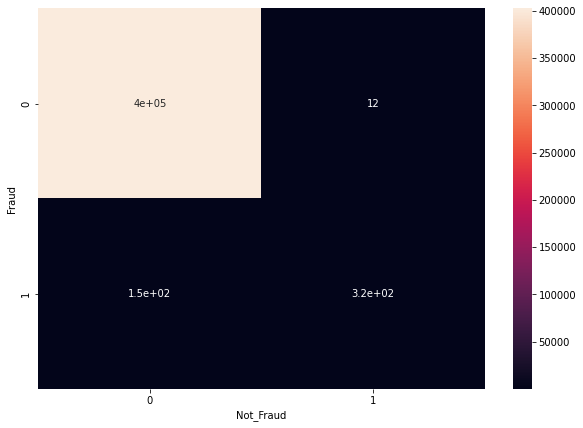

In [41]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Not_Fraud')
plt.ylabel('Fraud')